## Exploring the face image dataset

In [1]:
from sklearn.datasets import fetch_lfw_people

In [33]:
face_data = fetch_lfw_people(min_faces_per_person=50)

In [34]:
type(face_data)

sklearn.utils.Bunch

In [35]:
X = face_data.data
Y = face_data.target

print('Input data size : ',X.shape)
print('Output data size : ',Y.shape)
print('Label nmaes : ',face_data.target_names)

Input data size :  (1560, 2914)
Output data size :  (1560,)
Label nmaes :  ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']


In [40]:
for i in range(len(face_data.target_names)):
    print(f'Class {i} has {(Y == i).sum()} samples.')

Class 0 has 77 samples.
Class 1 has 236 samples.
Class 2 has 121 samples.
Class 3 has 530 samples.
Class 4 has 109 samples.
Class 5 has 71 samples.
Class 6 has 52 samples.
Class 7 has 55 samples.
Class 8 has 53 samples.
Class 9 has 60 samples.
Class 10 has 52 samples.
Class 11 has 144 samples.


In [41]:
import matplotlib.pyplot as plt

In [42]:
plt.rcParams["figure.figsize"]= (20,10)

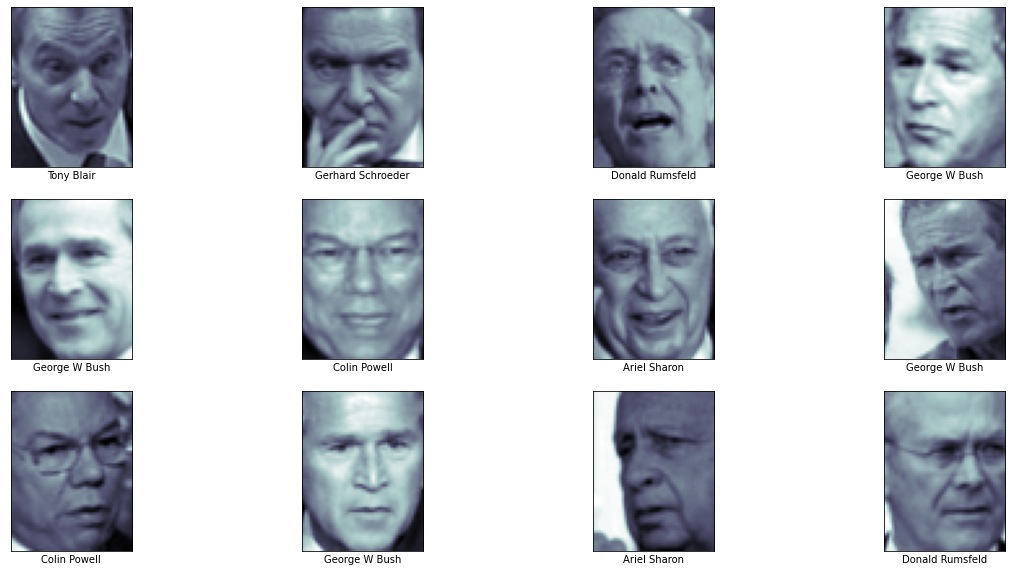

In [43]:
fig,ax = plt.subplots(3,4)
for i,axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i],cmap = 'bone')
    axi.set(xticks = [],yticks = [],xlabel = face_data.target_names[face_data.target[i]])
plt.show()

## Building an SVM-based image classifier

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

In [45]:
clf = SVC(class_weight='balanced',random_state=42)

In [46]:
params = {'C':[0.1,1,10],'gamma':[1e-07,1e-08,1e-06],'kernel':['rbf','linear']}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,param_grid=params,n_jobs=-1,cv=5)

In [47]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1e-07, 1e-08, 1e-06],
                         'kernel': ['rbf', 'linear']})

In [48]:
print('The best model : \n',grid_search.best_params_)

The best model : 
 {'C': 10, 'gamma': 1e-07, 'kernel': 'rbf'}


In [49]:

print('The best average performance : \n',grid_search.best_score_)

The best average performance : 
 0.7897435897435898


In [50]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test)

In [51]:
print(f'The accuracy is : {clf_best.score(X_test,Y_test)*100:.1f}%')

The accuracy is : 83.1%


In [52]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,pred,target_names=face_data.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.81      0.76        16
     Colin Powell       0.85      0.92      0.88        66
  Donald Rumsfeld       0.66      0.70      0.68        27
    George W Bush       0.90      0.89      0.89       140
Gerhard Schroeder       0.62      0.62      0.62        24
      Hugo Chavez       0.80      0.71      0.75        17
   Jacques Chirac       0.86      0.60      0.71        10
    Jean Chretien       0.79      0.79      0.79        14
    John Ashcroft       0.88      0.94      0.91        16
Junichiro Koizumi       1.00      0.82      0.90        11
  Serena Williams       1.00      0.89      0.94         9
       Tony Blair       0.79      0.78      0.78        40

         accuracy                           0.83       390
        macro avg       0.82      0.79      0.80       390
     weighted avg       0.83      0.83      0.83       390



## Boosting image classification performance with PCA

In [53]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [54]:
pca = PCA(n_components=100,whiten=True,random_state=42)
svc = SVC(class_weight='balanced',kernel='rbf',random_state=42)

model = Pipeline([('pca',pca),('svc',svc)])

In [55]:
params_pipeline = {'svc__C':[1,3,10],'svc__gamma':[0.001,0.005]}

grid_search = GridSearchCV(model,params_pipeline)
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=100, random_state=42,
                                            whiten=True)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             param_grid={'svc__C': [1, 3, 10], 'svc__gamma': [0.001, 0.005]})

In [56]:
print('The best model : \n',grid_search.best_params_)

The best model : 
 {'svc__C': 3, 'svc__gamma': 0.005}


In [57]:
print('The best average performance : \n',grid_search.best_score_)
model_best = grid_search.best_estimator_
pred = model_best.predict(X_test)
print(f'The accuracy is : {model_best.score(X_test,Y_test)*100:.1f}%')
print(classification_report(Y_test,pred,target_names=face_data.target_names))

The best average performance : 
 0.8051282051282052
The accuracy is : 83.8%
                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.88      0.78        16
     Colin Powell       0.78      0.92      0.85        66
  Donald Rumsfeld       0.61      0.81      0.70        27
    George W Bush       0.94      0.85      0.89       140
Gerhard Schroeder       0.82      0.75      0.78        24
      Hugo Chavez       0.81      0.76      0.79        17
   Jacques Chirac       0.86      0.60      0.71        10
    Jean Chretien       0.92      0.79      0.85        14
    John Ashcroft       0.88      0.88      0.88        16
Junichiro Koizumi       1.00      0.73      0.84        11
  Serena Williams       0.86      0.67      0.75         9
       Tony Blair       0.83      0.88      0.85        40

         accuracy                           0.84       390
        macro avg       0.83      0.79      0.81       390
     weighted avg       0.85      0.8

## EXERCISES

In [58]:
from sklearn.svm import LinearSVC

In [59]:
lin_svc = LinearSVC(class_weight='balanced',random_state=42)

In [60]:
params = {'C':[0.1,0.5],'tol':[1e-07]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=lin_svc,param_grid=params,n_jobs=-1,cv=5)

In [61]:
grid_search.fit(X_train,Y_train)

c:\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LinearSVC(class_weight='balanced', random_state=42),
             n_jobs=-1, param_grid={'C': [0.1, 0.5], 'tol': [1e-07]})

In [62]:
print(f'The best model : \n',grid_search.best_params_)

The best model : 
 {'C': 0.5, 'tol': 1e-07}


In [63]:
print(f'The best average performance : \n',grid_search.best_score_)

The best average performance : 
 0.7564102564102564


In [64]:
clf_best = grid_search.best_estimator_
pred = grid_search.predict(X_test)

In [65]:
print(f'The accuracy is : {clf_best.score(X_test,Y_test)*100:.1f}%')

The accuracy is : 79.2%


In [66]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,pred,target_names=face_data.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.62      0.71        16
     Colin Powell       0.81      0.89      0.85        66
  Donald Rumsfeld       0.68      0.70      0.69        27
    George W Bush       0.88      0.81      0.85       140
Gerhard Schroeder       0.67      0.83      0.74        24
      Hugo Chavez       0.85      0.65      0.73        17
   Jacques Chirac       0.75      0.60      0.67        10
    Jean Chretien       0.81      0.93      0.87        14
    John Ashcroft       0.78      0.88      0.82        16
Junichiro Koizumi       0.80      0.73      0.76        11
  Serena Williams       0.67      0.67      0.67         9
       Tony Blair       0.66      0.72      0.69        40

         accuracy                           0.79       390
        macro avg       0.77      0.75      0.75       390
     weighted avg       0.80      0.79      0.79       390

